![](https://www.txlottery.org/export/sites/lottery/Images/lotto_texas_logo.gif)

![](https://www.txlottery.org/export/sites/lottery/Images/lotto-how-to-win.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import seaborn as sns
from pydataset import data
import random
from collections import Counter
plt.rcParams['figure.figsize']=(13,7)

csv_url = 'https://txlottery.org/export/sites/lottery/Games/Lotto_Texas/Winning_Numbers/lottotexas.csv'
#https://www.txlottery.org/export/sites/lottery/Games/Lotto_Texas/Winning_Numbers/download.html
df = pd.read_csv(csv_url)

df.head()

,Lotto Texas,11,14,1992,13,16,22,29,32,36
0,Lotto Texas,11,18,1992,27,31,39,44,45,47
1,Lotto Texas,11,21,1992,11,21,24,28,31,46
2,Lotto Texas,11,25,1992,14,21,36,39,40,42
3,Lotto Texas,11,28,1992,9,17,21,24,28,50
4,Lotto Texas,12,2,1992,5,17,19,25,26,38


# Cleaning the DataFrame

In [3]:
data=[]
data.insert(0,{'Lotto Texas':'Lotto Texas','11':'11','14':'14','1992':'1992','13':'13','16':'16','22':'22','29':'29','32':'32','36':'36'})
df = pd.concat([pd.DataFrame(data),df],ignore_index=True)

df.columns = ['game','month','day','year','N0','N1','N2','N3','N4','N5']

# converting M,D,Y to datetime to adjust for game changes
df['date'] = pd.to_datetime(df[['month','day','year']])

# getting rid of all draws before 4-26-2006 due to game change
df = df[(df['date'] >= '2006-4-26')]

lotto = df.drop(["game", "month", "day", "year", "date"], axis=1)
lotto.head()


,N0,N1,N2,N3,N4,N5
1403,32,6,23,14,8,52
1404,44,31,5,10,7,28
1405,40,17,24,42,37,5
1406,18,40,10,17,25,39
1407,53,50,14,10,24,8


# Number Frequency

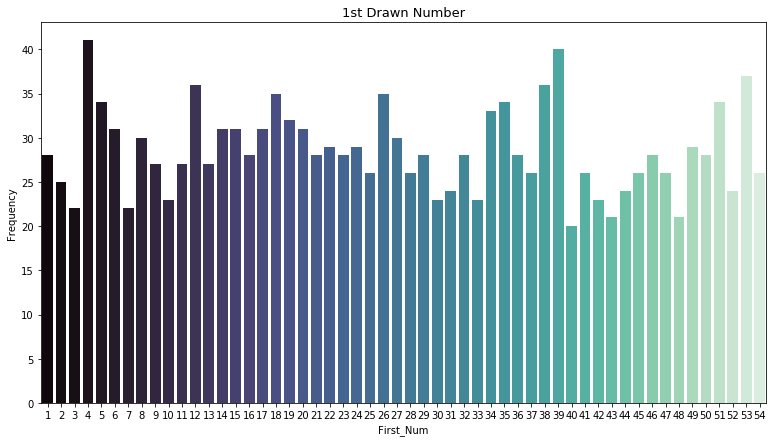

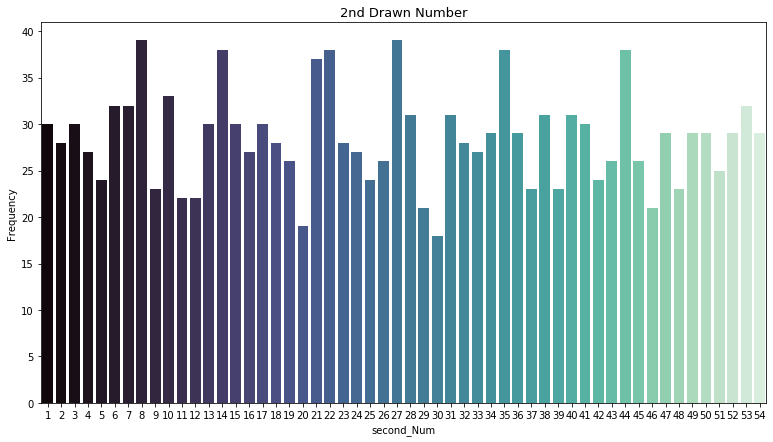

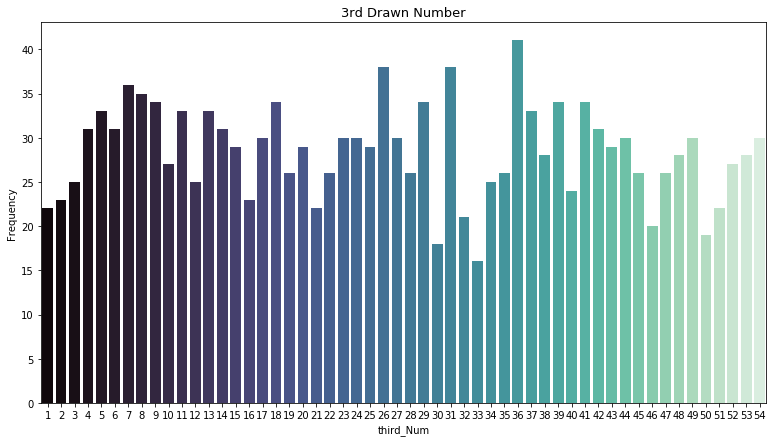

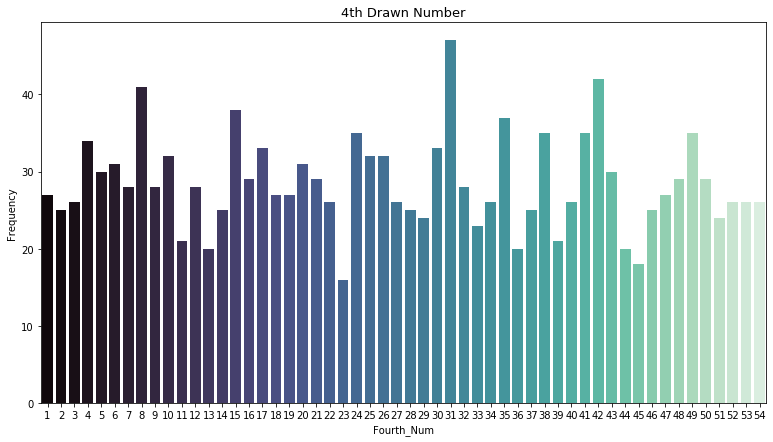

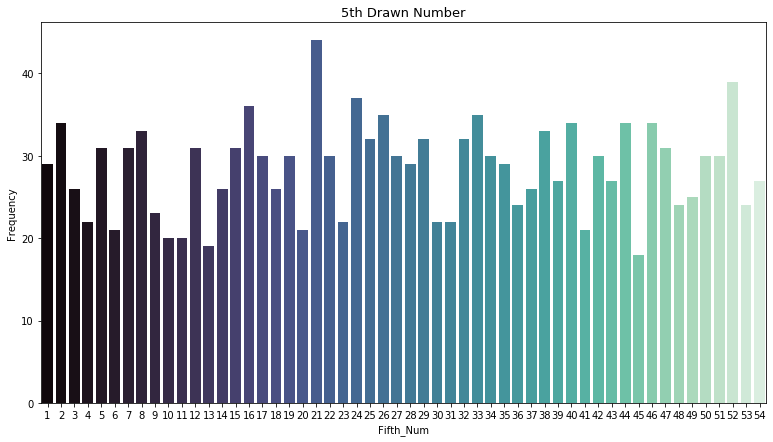

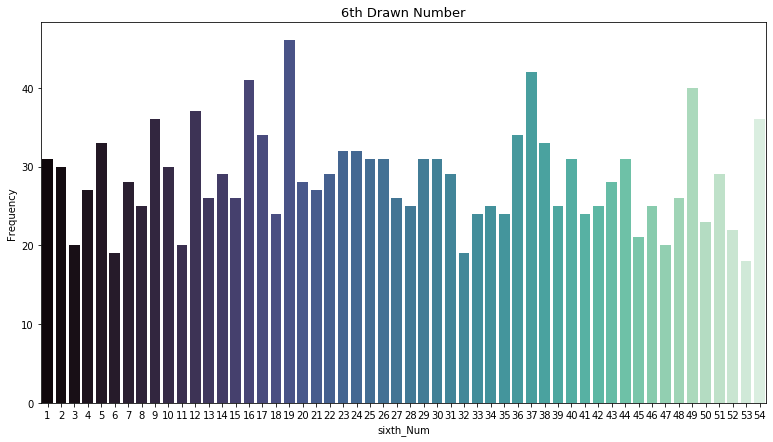

In [8]:
firsttop5 = lotto.N0.value_counts().rename_axis('First_Num').reset_index(name='Frequency')
sns.barplot(data=firsttop5, x='First_Num', y= 'Frequency', palette = 'mako')
plt.title('1st Drawn Number', fontsize=13)
plt.show()

secondtop5 = lotto.N1.value_counts().rename_axis('second_Num').reset_index(name='Frequency')
sns.barplot(data=secondtop5, x='second_Num', y= 'Frequency', palette = 'mako')
plt.title('2nd Drawn Number', fontsize=13)
plt.show()

thirdtop5 = lotto.N2.value_counts().rename_axis('third_Num').reset_index(name='Frequency')
sns.barplot(data=thirdtop5, x='third_Num', y= 'Frequency', palette = 'mako')
plt.title('3rd Drawn Number', fontsize=13)
plt.show()

fourthtop5 = lotto.N3.value_counts().rename_axis('Fourth_Num').reset_index(name='Frequency')
sns.barplot(data=fourthtop5, x='Fourth_Num', y= 'Frequency', palette = 'mako')
plt.title('4th Drawn Number', fontsize=13)
plt.show()

fifthtop5 = lotto.N4.value_counts().rename_axis('Fifth_Num').reset_index(name='Frequency')
sns.barplot(data=fifthtop5, x='Fifth_Num', y= 'Frequency', palette = 'mako')
plt.title('5th Drawn Number', fontsize=13)
plt.show()

sixthtop5 = lotto.N5.value_counts().rename_axis('sixth_Num').reset_index(name='Frequency')
sns.barplot(data=sixthtop5, x='sixth_Num', y= 'Frequency', palette = 'mako')
plt.title('6th Drawn Number', fontsize=13)
plt.show()

# Texas Lotto Number Generator

In [20]:
######################################################################
######################################################################
# LAMBDA FUNCTION
# First number
first_column = lotto['N0'].tolist()
print('first column count is', len(first_column))

first_num = random.choice(first_column)
print('       ',first_num)
################# Second number
second_column = lotto['N1'].tolist()
print('second column count is', len(second_column))

fixed_second = list(filter(lambda x: x != first_num, second_column))
print('fixed second column count is', len(fixed_second))

second_num = random.choice(fixed_second)
print('       ',second_num)
################# Third number
third_column = lotto['N2'].tolist()
print('third column count is', len(third_column))

third = list(filter(lambda x: x != first_num, third_column))
fixed_third = list(filter(lambda x: x != second_num, third))
print('fixed third column count is', len(fixed_third))

third_num = random.choice(fixed_third)
print('       ',third_num)
################# Fourth number
fourth_column = lotto['N3'].tolist()
print('fourth column count is', len(fourth_column))

four = list(filter(lambda x: x != first_num, fourth_column))
fourth = list(filter(lambda x: x != second_num, four))
fixed_fourth = list(filter(lambda x: x != third_num, fourth))
print('fixed fourth column count is', len(fixed_fourth))

fourth_num = random.choice(fixed_fourth)
print('       ',fourth_num)
################# Fifth number
fifth_column = lotto['N4'].tolist()
print('fifth column count is', len(fifth_column))

five = list(filter(lambda x: x != first_num, fifth_column))
fives = list(filter(lambda x: x != second_num, five))
fifth = list(filter(lambda x: x != third_num, fives))
fixed_fifth = list(filter(lambda x: x != fourth_num, fifth))
print('fixed fitfth column count is', len(fixed_fifth))

fifth_num = random.choice(fixed_fifth)
print('       ',fifth_num)
################ 6th number
sixth_column = lotto['N5'].tolist()
print('sixth column count is', len(sixth_column))

six = list(filter(lambda x: x != first_num, sixth_column))
sixes = list(filter(lambda x: x != second_num, six))
sixer = list(filter(lambda x: x != third_num, sixes))
sixth = list(filter(lambda x: x != fourth_num, sixer))
fixed_sixth = list(filter(lambda x: x != fifth_num, sixth))
print('fixed sixth column count is', len(fixed_sixth))

sixth_num = random.choice(fixed_sixth)
print('       ',sixth_num)
print('')
print(first_num,'-', second_num,'-', third_num,'-', fourth_num,'-', fifth_num,'-', sixth_num)

first column count is 1539
        26
second column count is 1539
fixed second column count is 1513
        18
third column count is 1539
fixed third column count is 1467
        3
fourth column count is 1539
fixed fourth column count is 1454
        7
fifth column count is 1539
fixed fitfth column count is 1421
        48
sixth column count is 1539
fixed sixth column count is 1410
        4

26 - 18 - 3 - 7 - 48 - 4


------------

# All-in-one Generator Function

In [21]:
import numpy as np
import pandas as pd
import random




def texaslotto_numbers():
    
    '''
    This function brings in a fresh csv to be cleaned and prepped for
    the number generator. The number generator selects numbers based on columns
    and columns are based on draw order. The frequency of numbers drawn is included
    in the number generator which is what gives this algorithm an advantage over
    traditional quick picks.
    ''' 
    
    # brings in a fresh csv
    csv_url = 'https://txlottery.org/export/sites/lottery/Games/Lotto_Texas/Winning_Numbers/lottotexas.csv'
    df = pd.read_csv(csv_url)
    
    # cleans and preps the dataframe
    data=[]
    data.insert(0,{'Lotto Texas':'Lotto Texas','11':'11','14':'14','1992':'1992','13':'13','16':'16','22':'22','29':'29','32':'32','36':'36'})
    df = pd.concat([pd.DataFrame(data),df],ignore_index=True)
    df.columns = ['game','M','D','Y','N0','N1','N2','N3','N4','N5']
    lotto = df.drop(["game", "M", "D", "Y"], axis=1)
    
    first_column = lotto['N0'].tolist()
    print('first column count is', len(first_column))

    first_num = random.choice(first_column)
    print('       ',first_num)
    ################# Second number
    second_column = lotto['N1'].tolist()
    print('second column count is', len(second_column))

    fixed_second = list(filter(lambda x: x != first_num, second_column))
    print('fixed second column count is', len(fixed_second))

    second_num = random.choice(fixed_second)
    print('       ',second_num)
    ################# Third number
    third_column = lotto['N2'].tolist()
    print('third column count is', len(third_column))

    third = list(filter(lambda x: x != first_num, third_column))
    fixed_third = list(filter(lambda x: x != second_num, third))
    print('fixed third column count is', len(fixed_third))

    third_num = random.choice(fixed_third)
    print('       ',third_num)
    ################# Fourth number
    fourth_column = lotto['N3'].tolist()
    print('fourth column count is', len(fourth_column))

    four = list(filter(lambda x: x != first_num, fourth_column))
    fourth = list(filter(lambda x: x != second_num, four))
    fixed_fourth = list(filter(lambda x: x != third_num, fourth))
    print('fixed fourth column count is', len(fixed_fourth))

    fourth_num = random.choice(fixed_fourth)
    print('       ',fourth_num)
    ################# Fifth number
    fifth_column = lotto['N4'].tolist()
    print('fifth column count is', len(fifth_column))

    five = list(filter(lambda x: x != first_num, fifth_column))
    fives = list(filter(lambda x: x != second_num, five))
    fifth = list(filter(lambda x: x != third_num, fives))
    fixed_fifth = list(filter(lambda x: x != fourth_num, fifth))
    print('fixed fitfth column count is', len(fixed_fifth))

    fifth_num = random.choice(fixed_fifth)
    print('       ',fifth_num)
    ################ 6th number
    sixth_column = lotto['N5'].tolist()
    print('sixth column count is', len(sixth_column))

    six = list(filter(lambda x: x != first_num, sixth_column))
    sixes = list(filter(lambda x: x != second_num, six))
    sixer = list(filter(lambda x: x != third_num, sixes))
    sixth = list(filter(lambda x: x != fourth_num, sixer))
    fixed_sixth = list(filter(lambda x: x != fifth_num, sixth))
    print('fixed sixth column count is', len(fixed_sixth))

    sixth_num = random.choice(fixed_sixth)
    print('       ',sixth_num)
    print('')
    print(first_num,'-', second_num,'-', third_num,'-', fourth_num,'-', fifth_num,'-', sixth_num)
    
    

In [2]:
texaslotto_numbers()

first column count is 2929
        26
second column count is 2929
fixed second column count is 2875
        22
third column count is 2929
fixed third column count is 2797
        25
fourth column count is 2929
fixed fourth column count is 2744
        36
fifth column count is 2929
fixed fitfth column count is 2703
        14
sixth column count is 2929
fixed sixth column count is 2643
        4

26 - 22 - 25 - 36 - 14 - 4


In [4]:
### Working on recursive function ###
def times_to_win(args, x):
    # Call system clear
    clear()
    # Keep track of count
    count = 1
    # Infinite loop
    while True:
        clear()
        # Display goal until user presses Enter
        print("Goal Lottery Numbers: " + str(args) + " Power Ball: " + str(x))

        # Grab five non-repeating random numbers from x to y
        lottery_num = random.sample(range(13, 58, 1), 5)

        # Add Power Ball
        power_ball = pwr_ball()

        # Print out current attempt
        print("Attempt # " + str(count) + " - " + str(lottery_num) + " - Power Ball " + str(power_ball))

        # Test if the amount of like numbers = 5
        if len(set(lottery_num) & set(args)) == 5 and power_ball == x:
            print("It took " + str(count) + " times to win the lottery!")
            # Exit when found!
            exit()
        else:
            count += 1

------------

# Kmeans Clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
x = lotto[['N0']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)

kmeans.predict(x)

array([1, 3, 1, ..., 3, 4, 2], dtype=int32)

In [8]:
kmeans.cluster_centers_.round(0)

array([[32.],
       [13.],
       [50.],
       [22.],
       [ 4.],
       [41.]])

In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroids

,N0
0,32.086694
1,12.990421
2,49.657682
3,22.444037
4,4.399602
5,40.917695


In [11]:
lotto['cluster'] = kmeans.predict(x)

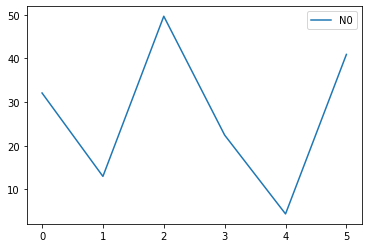

In [13]:
centroids.plot()